### These five stocks were the S&P 500’s best performers this year (2019). Chipotle Mexican Grill(CMG), Target(TGT), KLA Corp (KLAC), Lam Research(LRCX), Advanced Micro Devices Inc(AMD). We will analyze the returns, risk, correlation  for these companies ifor the past 5 years(2014- 2019). 


In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

In [2]:
tickers = ["CMG", "TGT", "KLAC", "LRCX", "AMD"]
stock_data = pd.DataFrame()
for t in tickers:
    stock_data[t] = web.DataReader(t, "yahoo", start = "2014-1-1")["Adj Close"]

In [3]:
stock_data.tail()

,CMG,TGT,KLAC,LRCX,AMD
Date,,,,,
2019-12-24,828.890015,128.550003,178.110001,294.480011,46.540001
2019-12-26,838.599976,128.889999,178.750000,294.920013,46.630001
2019-12-27,836.789978,129.210007,178.520004,293.700012,46.180000
2019-12-30,836.070007,128.889999,178.369995,292.540009,45.520000
2019-12-31,837.109985,128.210007,178.169998,292.399994,45.860001


### data normilization to observe trends

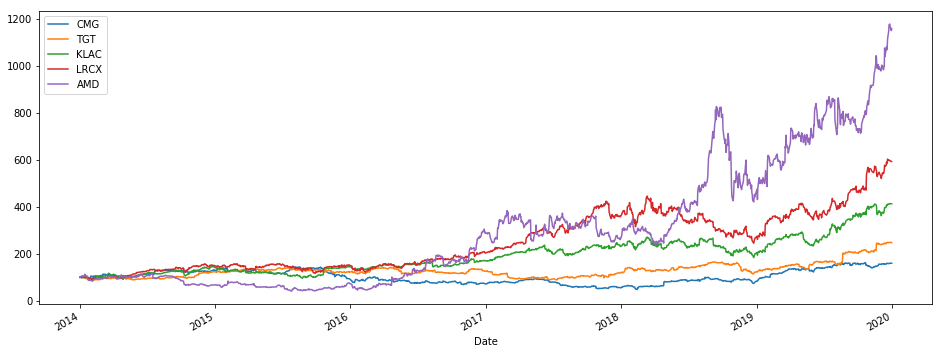

In [4]:
(stock_data/stock_data.iloc[0] * 100).plot(figsize = (16,6))

### Seperate plots for individualization

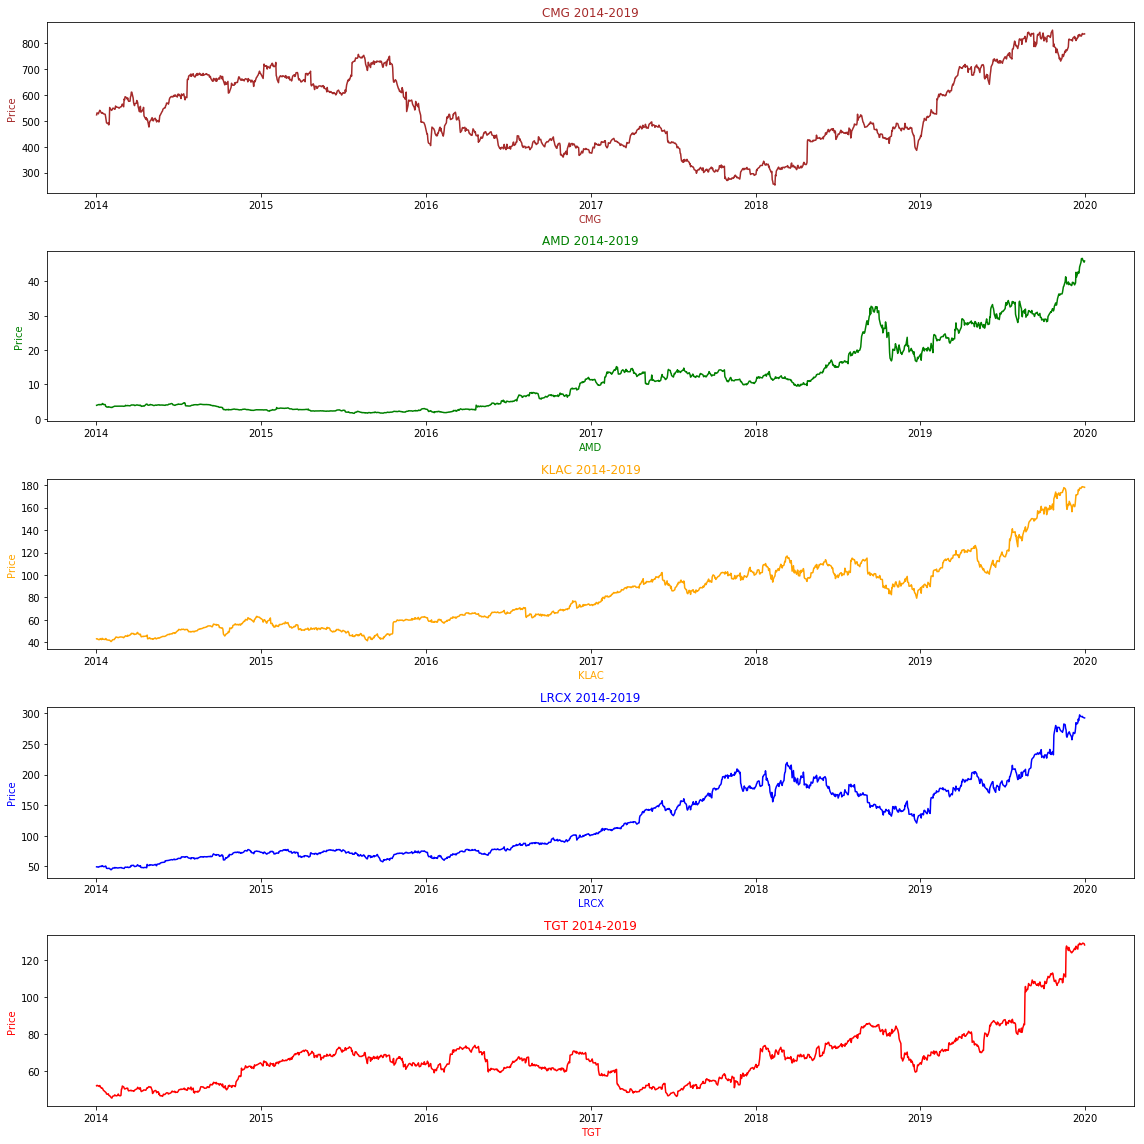

In [5]:
fig, axes = plt.subplots(5,1, figsize = (16,16))
axes[0].plot(stock_data["CMG"], color = "brown")
axes[0].set_xlabel("CMG", color = "brown")
axes[0].set_ylabel("Price", color = "brown")
axes[0].set_title("CMG 2014-2019", color = "brown")

axes[1].plot(stock_data["AMD"], color = "g")
axes[1].set_xlabel("AMD", color = "g")
axes[1].set_ylabel("Price", color = "g")
axes[1].set_title("AMD 2014-2019", color = "g")

axes[2].plot(stock_data["KLAC"], color = "orange")
axes[2].set_xlabel("KLAC", color = "orange")
axes[2].set_ylabel("Price", color = "orange")
axes[2].set_title("KLAC 2014-2019", color = "orange")

axes[3].plot(stock_data["LRCX"], color = "b")
axes[3].set_xlabel("LRCX", color = "b")
axes[3].set_ylabel("Price", color = "b")
axes[3].set_title("LRCX 2014-2019", color = "b")

axes[4].plot(stock_data["TGT"], color = "r")
axes[4].set_xlabel("TGT", color = "r")
axes[4].set_ylabel("Price", color = "r")
axes[4].set_title("TGT 2014-2019", color = "r")
fig.tight_layout()

### we will calculate the reurns for the secirities in this portfolio

In [6]:
simple_returns = (stock_data/stock_data.shift(1)) - 1

In [7]:
simple_returns.dropna(inplace=True)

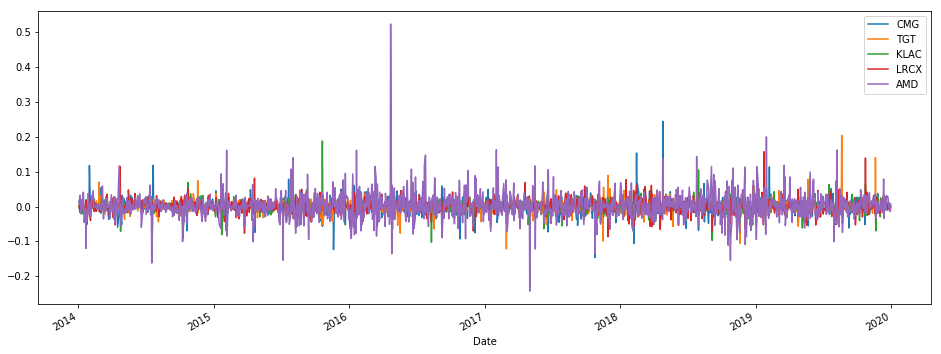

In [8]:
simple_returns.plot(figsize = (16,6))

### we will run conditons on the data set to try to pull some data out of this data set. With Chiptole being the highest earning stock we will start there

In [9]:
simple_returns["CMG"].sort_values(ascending = False).head(1)

Date
2018-04-26    0.244404
Name: CMG, dtype: float64

### Chipotle hightest return was 24% for this period ,occurring on 2018-04-26 

In [10]:
simple_returns["CMG"].sort_values().head(1)

Date
2017-10-25   -0.145822
Name: CMG, dtype: float64

### Chipole most sigificant loss was on 2017-10-25 losing 14%

###--

### we wll check how chipole performed for the 2019 year

In [11]:
chipolte_VOl = (simple_returns["CMG"].loc["2019-1-1":].std() * 250 ** 0.5) * 100
print(f"Chipotle has a volitility for 2019 of {chipolte_VOl} %")

Chipotle has a volitility for 2019 of 26.809482397110358 %


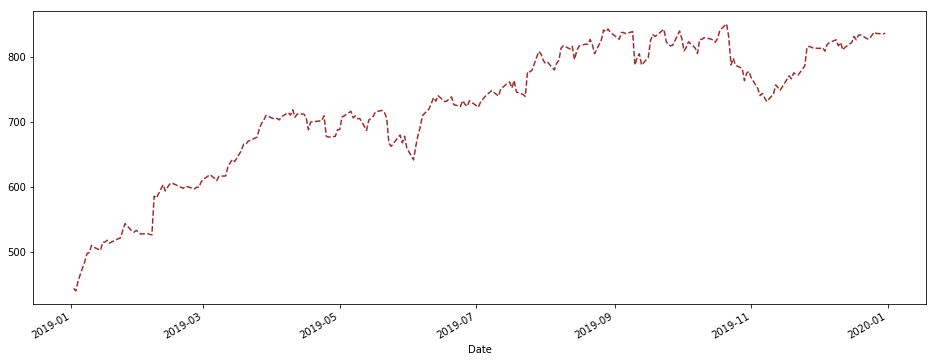

In [12]:
stock_data["CMG"].loc["2019-1-1":].plot(figsize = (16,6), color = "brown", ls = "--")

In [13]:
x_constant = stock_data["CMG"]
y = stock_data["TGT"]

In [16]:
model = sm.OLS(y, x_constant).fit()

In [17]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.935     
Dependent Variable: TGT              AIC:                12920.2802
Date:               2020-01-01 13:25 BIC:                12925.6001
No. Observations:   1510             Log-Likelihood:     -6459.1   
Df Model:           1                F-statistic:        2.189e+04 
Df Residuals:       1509             Prob (F-statistic): 0.00      
R-squared:          0.936            Scale:              304.28    
----------------------------------------------------------------------
          Coef.     Std.Err.       t        P>|t|     [0.025    0.975]
----------------------------------------------------------------------
CMG       0.1198      0.0008    147.9618    0.0000    0.1182    0.1213
-------------------------------------------------------------------
Omnibus:               557.430       Durbin-Watson:          0.008 
Prob(Omnibus):         0.000         Jarque-Bera (JB):       78.977
Skew:                  -0.125        Prob(JB):               0.000 
Kurtosis:              1.908         Condition No.:          1     
===================================================================

"""

In [23]:
regressionLine = model.predict()
regressionLine

array([ 62.68460672,  63.62829549,  63.1504647 , ..., 100.21177887,
       100.12555706, 100.25010211])

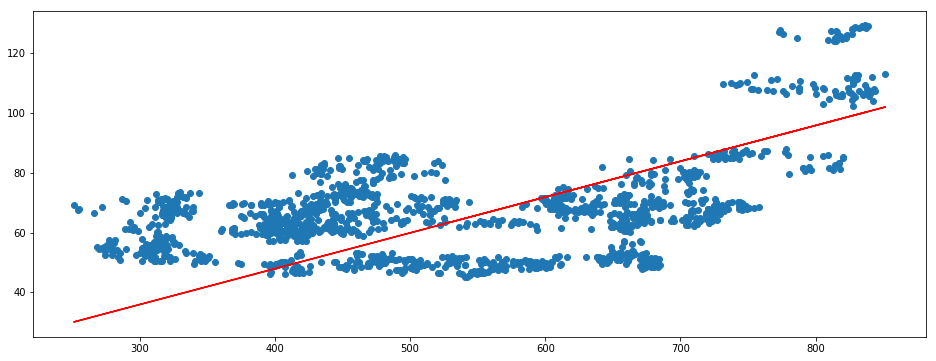

In [24]:
plt.figure(figsize=(16,6))
plt.scatter(stock_data["CMG"], stock_data["TGT"])
plt.plot(stock_data["CMG"], regressionLine, color = "r")

In [25]:
summary = stats.linregress(stock_data["CMG"], stock_data["TGT"])

In [26]:
summary

LinregressResult(slope=0.051461536988259345, intercept=39.33513468627536, rvalue=0.48598202414748265, pvalue=2.517599083588621e-90, stderr=0.002383185282190674)